# #4 Testing

1. [Motivation](#Motivation)
    1. [What is testing?](#What-is-testing?)
    2. [Why do I need it?](#Why-do-I-need-it?)
    3. [When should I write tests?](#When-should-I-write-tests?)
2. [Test design](#Test-design)
    1. [What tests do I write? ](#What-tests-do-I-write? )
    2. [Equivalence class partitioning](#Equivalence-class-partitioning)
    3. [Boundary-value analysis](#Boundary-value-analysis)
    4. [Write narrow tests](#Write-narrow-tests)
    5. [Repeat Yourself](#Repeat-Yourself)
3. [Testing](#Testing)
    1. [Unit](#Unit)
    2. [Integration](#Integration)
    3. [Functional](#Functional)
    4. [Acceptance](#Acceptance)
    5. [Anti-patterns](#Anti-patterns)
4. [Techniques](#Techniques)
    1. [Mocking](#Mocking)
    2. [Monkey patching](#Monkey-patching)
    3. [Fixtures](#Fixtures)
5. [Automatization](#Automatization)
    1. [Continuous Integration](#Continuous-Integration)
    2. [Continuous Delivery](#Continuous-Delivery)
    3. [Continuous Deployment](#Continuous-Deployment)
6. [Best practices](#Best-practices)
    1. [Feature flags](#Feature-flags)
    2. [Canary deployment](#Canary-deployment)
    3. [Staged rollouts](#Staged-rollouts)

## Motivation

#### What is testing?

Testing is learning more about the application or system under test. This includes, but is definitely not limited to, checking that it responds as you expect to various inputs and environments. There is a tendency among programmers to view testing as a bottom-up checking mechanism. A sort of correctness filter you can pass your software through at various levels to ensure it’s doing what you want it to do. 

You could compare testing to being a scientist. When faced with a new application or system you have some information about what it’s supposed to do and if you’re very lucky, an idea about how it should do it. Treat this as the hypothesis under test, and null hypothesis is that everything is broken

 #### Why do I need it?

Testing is confidence, it’s a way to make sure you’re doing what you should be doing. It’s information, it tells you about how your software works. It’s ease of writing, if you’re refactoring, or doing TDD, you’ll find that your tests tell you exactly what you should be accepting and pushing out, and break it down into conceptualisable chunks. If you can’t conceptualise it, you’ve not broken it down far enough, test each step and you’ll get there.

#### When should I write tests?

All the time.

Test the design, test the components, test your functions, test your whole system. When you notice a bug, write a test for it, then fix the bug. Write more tests around that area, fix the bugs those expose. Testing should be as much a part of development as anything else. Every now and then, just stop writing and explore what you have.

## Test design

#### What tests do I write? 

In [2]:
def square_root_bi(x, epsilon):
    """Return y s.t. y*y is within epsilon of x"""
    assert x >= 0, 'x must be non-negative, not ' + str(x)
    assert epsilon > 0, 'epsilon must be postive, not ' + str(epsilon)
    low = 0
    high = max(x, 1.0)
    guess = (low + high) / 2.0
    ctr = 1
    max_ctr = 1000
    while abs(guess**2 - x) > epsilon and ctr <= max_ctr:
        if guess**2 < x:
            low = guess
        else:
            high = guess
        guess = (low + high) / 2.0
        ctr += 1
    assert ctr <= max_ctr, 'Iteration count exceeded'
    print('Bi method.  Num. iterations:', ctr, 'Estimate:', guess)
    return guess

# square_root_bi(0.25, 0.001)


def test_bi():
    print(" square_root_bi(4, 0.0001)")
    print(square_root_bi(4, 0.0001))

    print(" square_root_bi(9, 0.0001)")
    print(square_root_bi(9, 0.0001))

    print(" square_root_bi(2, 0.0001)")
    print(square_root_bi(2, 0.0001))

    print(" square_root_bi(0.25, 0.0001)")
    print(square_root_bi(0.25, 0.0001))

test_bi()

 square_root_bi(4, 0.0001)
Bi method.  Num. iterations: 1 Estimate: 2.0
2.0
 square_root_bi(9, 0.0001)
Bi method.  Num. iterations: 18 Estimate: 2.99998855591
2.99998855591
 square_root_bi(2, 0.0001)
Bi method.  Num. iterations: 14 Estimate: 1.41418457031
1.41418457031
 square_root_bi(0.25, 0.0001)
Bi method.  Num. iterations: 1 Estimate: 0.5
0.5


In [9]:
import math

def test_bi_unsigned_int():
    for i in xrange(2**32):
        expected_sqrt = math.sqrt(i)
        sqrt = square_root_bi(i, 0.0001)
        diff = abs(sqrt - expected_sqrt)
        assert diff < 0.01, diff

Our goal is __minimum__ number of tests with __maximum__ coverage

#### Equivalence class partitioning

ECP divides the input data of a software unit into partitions of equivalent data from which test cases can be derived. In principle, test cases are designed to cover each partition at least once. This technique tries to define test cases that uncover classes of errors, thereby reducing the total number of test cases that must be developed. An advantage of this approach is reduction in the time required for testing a software due to lesser number of test cases.

In [27]:
def score2mark(score):
    if 0 <= score <= 59:
        return 2
    elif 60 <= score <= 74:
        return 3
    elif 75 <= score <= 89:
        return 4
    elif 90 <= score <= 100:
        return 5
    raise ValueError("Invalid score %s" % score)

Equivalence classes:
* [0; 59],
* [60; 74],
* [75; 89],
* [90; 100],

In [26]:
def test_mark_valid_score():
    score_to_expected_mark = {
        40: 2,
        65: 3,
        80: 4,
        95: 5,
    }
    for s, m in score_to_expected_mark.items():
        returned_mark = score2mark(s)
        assert returned_mark == m, "Mark for score %s is %s, but %s expected" % (s, returned_mark, m)

test_mark_valid_score()

Just because two items/values are suppose to be in the same class and behave the same, does not mean they DO behave the same.

#### Boundary-value analysis

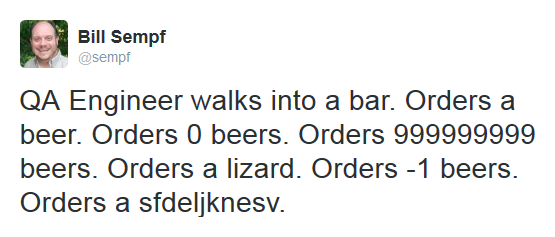

Boundary value analysis is a software testing technique in which tests are designed to include representatives of boundary values in a range

In [33]:
def test_mark_invalid_score():
    for s in (-1, 101, 2**64, ""):
        try:
            m = score2mark(s)
        except Exception, e:
            assert isinstance(e, ValueError), "Unexpected error: %s: %s" % (type(e), e)
        else:
            raise AssertionError("No error for bad value: score2mark(%s) -> %s" % (s, m))

def test_mark_float_score():
    s = 3.14
    expected_mark = 2
    m = score2mark(s)
    assert m == expected_mark, "Mark for score %s is %s, but %s expected" % (s, m, expected_mark)

    
test_mark_invalid_score()
test_marks_float_score()

Real world use cases:
* spacecraft metric systems
* radiation therapy
* Knight Capital

#### Write narrow tests

In [ ]:
class AccountsApiTestCase(TestCase):
    def setUp(self):
        super(AccountsApiTestCase, self).setUp()
        self.user.access_api_v2 = True
        self.user.save()

    def test_api_access(self):
        response = self.client.get(reverse('user-api'))
        self.assertEqual(response.status_code, OK)

        self.user.access_api_v2 = False
        self.user.save()
        response = self.client.get(reverse('user-api'))
        self.assertEqual(response.status_code, FORBIDDEN)

    def test_create_token(self):
        self.make_user_not_admin(self.user)
        # при первом заходе генерится ключ доступа
        self.client.get(reverse('user-api'))
        api_key = ApiKey.objects.get(user=self.user, is_blocked=False)
        self.assertEqual(api_key.allowed_ips, [])
        self.assertEqual(api_key.expired, None)

        # при втором заходе уже не генерится
        self.client.get(reverse('user-api'))
        self.assertEqual(ApiKey.objects.filter(user=self.user).count(), 1)

In [ ]:
# flavors/tests/test_api.py
import json

from django.test import TestCase
from django.urls import reverse

from flavors.models import Flavor

class DjangoRestFrameworkTests(TestCase):

    def setUp(self):
        Flavor.objects.get_or_create(title='title1', slug='slug1')
        Flavor.objects.get_or_create(title='title2', slug='slug2')

        self.create_read_url = reverse('flavor_rest_api')
        self.read_update_delete_url = \
            reverse('flavor_rest_api', kwargs={'slug': 'slug1'})

    def test_list(self):
        response = self.client.get(self.create_read_url)

        # Are both titles in the content?
        self.assertContains(response, 'title1')
        self.assertContains(response, 'title2')

    def test_detail(self):
        response = self.client.get(self.read_update_delete_url)
        data = json.loads(response.content)
        content = {'id': 1, 'title': 'title1', 'slug': 'slug1',
                                            'scoops_remaining': 0}
        self.assertEquals(data, content)

    def test_create(self):
        post = {'title': 'title3', 'slug': 'slug3'}
        response = self.client.post(self.create_read_url, post)
        data = json.loads(response.content)
        self.assertEquals(response.status_code, 201)
        content = {'id': 3, 'title': 'title3', 'slug': 'slug3',
                                            'scoops_remaining': 0}
        self.assertEquals(data, content)
        self.assertEquals(Flavor.objects.count(), 3)

    def test_delete(self):
        response = self.client.delete(self.read_update_delete_url)
        self.assertEquals(response.status_code, 204)
        self.assertEquals(Flavor.objects.count(), 1)

#### Repeat Yourself

In [ ]:
    def assertSuccess(self, response):
        status, data = self.get_parsed_json(response)
        self.assertTrue(status, data)

    def assertForbiddenGet(self, url):
        response = self.api_client.get(url)
        status, data = self.get_parsed_json(response)
        self.assertFalse(status)
        self.assertError(response, api_errors.FORBIDDEN)

    def assertForbiddenPost(self, url, post_data):
        response = self.api_client.post(url, json.dumps(post_data))
        status, data = self.get_parsed_json(response)
        self.assertFalse(status)
        self.assertError(response, api_errors.FORBIDDEN)

    def assertAllowedGet(self, url):
        response = self.api_client.get(url)
        status, data = self.get_parsed_json(response)
        self.assertTrue(status, data)

    def assertAllowedPost(self, url, post_data):
        response = self.api_client.post(url, json.dumps(post_data))
        status, data = self.get_parsed_json(response)
        self.assertTrue(status, data)

Tutorial anti-example

In [ ]:
def create_question(question_text, days):
    """
    Create a question with the given `question_text` and published the
    given number of `days` offset to now (negative for questions published
    in the past, positive for questions that have yet to be published).
    """
    time = timezone.now() + datetime.timedelta(days=days)
    return Question.objects.create(question_text=question_text, pub_date=time)


class QuestionIndexViewTests(TestCase):
    def test_no_questions(self):
        """
        If no questions exist, an appropriate message is displayed.
        """
        response = self.client.get(reverse('polls:index'))
        self.assertEqual(response.status_code, 200)
        self.assertContains(response, "No polls are available.")
        self.assertQuerysetEqual(response.context['latest_question_list'], [])

    def test_past_question(self):
        """
        Questions with a pub_date in the past are displayed on the
        index page.
        """
        create_question(question_text="Past question.", days=-30)
        response = self.client.get(reverse('polls:index'))
        self.assertQuerysetEqual(
            response.context['latest_question_list'],
            ['<Question: Past question.>']
        )

    def test_future_question(self):
        """
        Questions with a pub_date in the future aren't displayed on
        the index page.
        """
        create_question(question_text="Future question.", days=30)
        response = self.client.get(reverse('polls:index'))
        self.assertContains(response, "No polls are available.")
        self.assertQuerysetEqual(response.context['latest_question_list'], [])

    def test_future_question_and_past_question(self):
        """
        Even if both past and future questions exist, only past questions
        are displayed.
        """
        create_question(question_text="Past question.", days=-30)
        create_question(question_text="Future question.", days=30)
        response = self.client.get(reverse('polls:index'))
        self.assertQuerysetEqual(
            response.context['latest_question_list'],
            ['<Question: Past question.>']
        )

    def test_two_past_questions(self):
        """
        The questions index page may display multiple questions.
        """
        create_question(question_text="Past question 1.", days=-30)
        create_question(question_text="Past question 2.", days=-5)
        response = self.client.get(reverse('polls:index'))
        self.assertQuerysetEqual(
            response.context['latest_question_list'],
            ['<Question: Past question 2.>', '<Question: Past question 1.>']
        )

__Test failures and edge cases__

In [ ]:
class RBStorageTestCase(TestCase):
    def setUp(self):
        super(RBStorageTestCase, self).setUp()
        self.rb_storage = RBStorage()

    def test_get_file_path(self):
        func = RBStorage.get_file_path
        self.assertEqual(func('img', 'file.jpg'), '/img/file.jpg')
        self.assertEqual(func('img', 'file name.jpg'), '/img/file%20name.jpg')
        self.assertEqual(func(u'h5/subdir/путь/to', 'file'), '/h5/subdir/%D0%BF%D1%83%D1%82%D1%8C/to/file')
        self.assertRaises(RBStorageException, lambda: func('img', 'тест'))
        self.assertRaises(RBStorageException, lambda: func('/img', 'file.jpg'))
        self.assertRaises(RBStorageException, lambda: func('img/', 'file.jpg'))

### References

* http://pythontesting.net/meta/info-needed-to-start-testing/
* https://alysivji.github.io/testing-101-introduction-to-testing.html
* https://www.youtube.com/watch?v=3MBT9O6i0jk&list=PLrCZzMib1e9pDKLsabJYuODdVJrHYc4Jd
* https://en.wikipedia.org/wiki/Black-box_testing
* https://en.wikipedia.org/wiki/Equivalence_partitioning
* https://en.wikipedia.org/wiki/Boundary-value_analysis
* https://stackoverflow.com/a/1952106
* http://faker.readthedocs.io/en/master/#how-to-use-with-factory-boy
* https://blog.acolyer.org/2017/11/30/the-role-of-software-in-spacecraft-accidents/
* http://www.cse.psu.edu/~gxt29/bug/softwarebug.html

### Summary

* write tests
* test everything everything important
* document your tests
* DRY does not apply to tests

## Testing

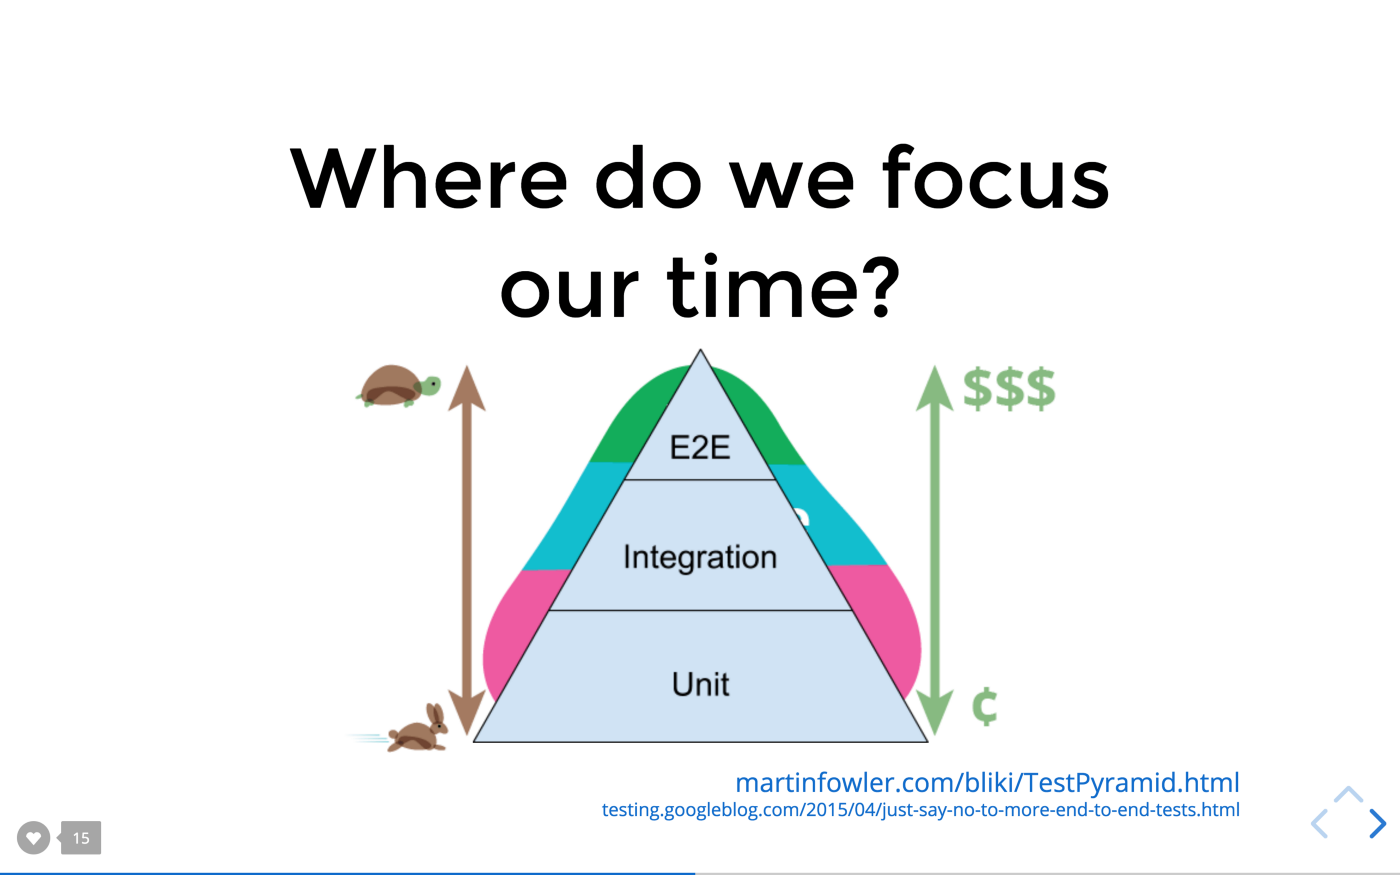

#### Unit

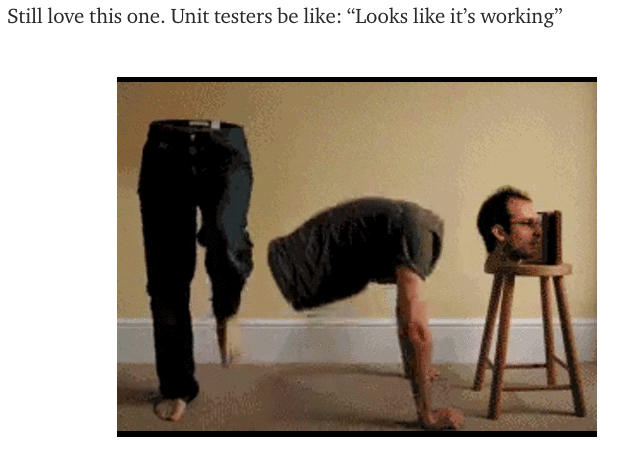

In [ ]:
# -*- coding: utf-8 -*-
# pylint: disable=C0301,W0105,W0401,W0614
'''
Tests for tarantool.response module
'''
import binascii
import sys
import unittest

py3 = sys.version_info.major >= 3
from_hex = lambda x: binascii.unhexlify(''.join(x.split()))
to_hex = lambda x: binascii.hexlify(x)


import tarantool.response


class field(unittest.TestCase):
    '''
    Tests for response.field class
    '''

    def test__init_from_unicode(self):
        '''
        Test field instantiation from str or unicode value
        '''
        # Word "Test" in cyrillic utf-8 encoded
        if py3:
            value = str(b"\xd0\xa2\xd0\xb5\xd1\x81\xd1\x82", "utf-8")
        else:
            value = unicode(b"\xd0\xa2\xd0\xb5\xd1\x81\xd1\x82", "utf-8")

        self.assertEqual(
            tarantool.response.field(value),
            b"\xd0\xa2\xd0\xb5\xd1\x81\xd1\x82",
            "Instantiate field from unicode string"
        )


    def test__init_from_bytes(self):
        '''
        Test field instantiation from raw bytes value
        '''
        # Word "Test" in cyrillic utf-8 encoded
        value = b"\xd0\xa2\xd0\xb5\xd1\x81\xd1\x82"

        self.assertEqual(
            tarantool.response.field(value),
            b"\xd0\xa2\xd0\xb5\xd1\x81\xd1\x82",
            "Instantiate field from bytes"
        )


    def test__init_from_int(self):
        '''
        Test field instantiation from integer value
        '''
        self.assertEqual(
            tarantool.response.field(0),
            b"\x00\x00\x00\x00",
            "Instantiate field from 32 bit integer value 0"
        )

        self.assertEqual(
            tarantool.response.field(0x11223344),
            b"\x44\x33\x22\x11",
            "Instantiate field from 32 bit integer value 0x11223344"
        )

        self.assertEqual(
            tarantool.response.field(0x7fffffff),
            b"\xff\xff\xff\x7f",
            "Instantiate field from 32 bit integer value 0x7fffffff"
        )

        self.assertEqual(
            tarantool.response.field(0xffffffff),
            b"\xff\xff\xff\xff",
            "Instantiate field from 32 bit integer value 0xffffffff"
        )

        self.assertEqual(
            tarantool.response.field(0xffffffffffffffff),
            b"\xff\xff\xff\xff\xff\xff\xff\xff",
            "Instantiate field from 64 bit integer value 0xffffffffffffffff"
        )

        self.assertEqual(
            tarantool.response.field(0x0100000000000000),
            b"\x00\x00\x00\x00\x00\x00\x00\x01",
            "Instantiate field from 64 bit integer value 0x0100000000000000"
        )

        self.assertEqual(
            tarantool.response.field(0x1122334455667788),
            b"\x88\x77\x66\x55\x44\x33\x22\x11",
            "Instantiate field from 64 bit integer value 0x1122334455667788"
        )

        # Out of range
        with self.assertRaises(ValueError):
            tarantool.response.field(0xffffffffffffffff+1)
            tarantool.response.field(-1)

        # Unsupported argument type
        with self.assertRaises(TypeError):
                tarantool.response.field(None)
                tarantool.response.field([1,2,3])


    def test__cast_to_int(self):
        '''
        Test type casting from field to int
        '''
        for i in (0, 0x11, 0x1122, 0x112233, 0xffffffff, 0xffffffffffffffff):
            f = tarantool.response.field(i)
            self.assertEqual(
                int(f),
                i,
                "Cast field instance to int, value = %d"%i
            )

        # Can't cast string value to int
        f = tarantool.response.field(b"not an int value")
        with self.assertRaises(ValueError):
            int(f)


    def test__cast_to_str(self):
        '''
        Test type casting from field to str or unicode
        '''
        # Word "Test" in cyrillic utf-8 encoded
        if py3:
            self.assertEqual(
                str(tarantool.response.field(b"\xd0\xa2\xd0\xb5\xd1\x81\xd1\x82")),
                str(b"\xd0\xa2\xd0\xb5\xd1\x81\xd1\x82", "utf-8"),
                "Cast field instance to unicode")
        else:
            self.assertEqual(
                unicode(tarantool.response.field(b"\xd0\xa2\xd0\xb5\xd1\x81\xd1\x82")),
                unicode(b"\xd0\xa2\xd0\xb5\xd1\x81\xd1\x82", "utf-8"),
                "Cast field instance to unicode")



class Response(unittest.TestCase):
    '''
    Tests for response.Response
    '''

    def test__init_single(self):
        '''
        Test Response instance creation: unpack single record
        '''
        header = from_hex(
            "0d000000" # request_type = 0x0d ("insert")
            "1b000000" # body_length = 27
            "00000000" # request_id
        )

        body = from_hex(
            "00000000"    # return_code = 0
            "01000000"    # count = 1
            "0b000000"    # tuple_size = 11
            "02000000"    # cardinality = 2
                          # tuple = (1, "JKLMN")
            "04 01000000" + "05 4a4b4c4d4e")

        self.assertEqual(
            tarantool.response.Response(header, body),
            [(b"\x01\x00\x00\x00", b"JKLMN")],
            "Create Response instance: single record"
        )

    def test__init_multiple(self):
        '''
        Test Response instance creation: unpack multiple records
        '''
        header = from_hex(
            "11000000" # request_type = 0x11 ("select")
            "51000000" # body_length = 32
            "00000000" # request_id
        )
        body = from_hex(
            "00000000" # return_code = 0
            "03000000" # count = 3
            "10000000" # tuple_size = 16 (0x10)
            "02000000" # cardinality = 2
                       # tuple = (1, "1111111111")
            "04 01000000" + "0a 31313131313131313131"
            "10000000" # tuple_size = 16 (0x10)
            "02000000" # cardinality = 2
                       # tuple = (2, "2222222222")
            "04 02000000" + "0a 32323232323232323232"
            "11000000" # tuple_size = 17 (0x11)
            "04000000" # cardinality = 4
                       # tuple = (3, "LLL", "MMM", "NNN")
            "04 03000000" + "03 4c4c4c" + "03 4d4d4d" + "03 4e4e4e"
        )

        self.assertEqual(
            tarantool.response.Response(header, body),
            [(b"\x01\x00\x00\x00", b"1111111111"),
            (b"\x02\x00\x00\x00", b"2222222222"),
            (b"\x03\x00\x00\x00", b"LLL", b"MMM", b"NNN")],
            "Create Response instance - multiple records with multiple fields"
        )

    def test__init_attrs(self):

        # Check instanse attributes

        header = from_hex("0d00000014000000 11223344")
        body = from_hex("00000000010000000400000002000000014b015a")
        r = tarantool.response.Response(header, body)

        self.assertEqual(r.return_code, 0, "Check return_code property")
        self.assertIsNone(r.return_message, "Check return_message property")
        self.assertEqual(r.return_code, 0, "Check completion_status property")
        self.assertEqual(r.rowcount, 1, "Check rowcount property")
        self.assertEqual(r._body_length, 20, "Check _body_length attribute")
        self.assertEqual(r._request_id, 0x44332211, "Check _request_id attribute")


In [ ]:
# -*- coding: utf-8 -*-
# pylint: disable=C0301,W0105,W0401,W0614
'''
Tests for tarantool.request module
'''

import binascii
import unittest


import tarantool.request


class RequestInsert(unittest.TestCase):

    def test__cast_to_bytes(self):
        '''
        Test binary INSERT request representation
        '''
        self.assertEqual(
            bytes(tarantool.request.RequestInsert(1, (1, 2000, 30000), False)),
            binascii.unhexlify("0d0000001b00000000000000010000000000000003000000040100000004d00700000430750000")
        )

        self.assertEqual(
            bytes(tarantool.request.RequestInsert(1, (b"AAA", b"BBBB", b"CCCCCC"), False)),
            binascii.unhexlify("0d0000001c0000000000000001000000000000000300000003414141044242424206434343434343")
        )


class RequestDelete(unittest.TestCase):

    def test__cast_to_bytes(self):
        '''
        Test binary DELETE request representation
        '''
        self.assertEqual(
            bytes(tarantool.request.RequestDelete(1, 1, False)),
            binascii.unhexlify("1500000011000000000000000100000000000000010000000401000000")
        )

        self.assertEqual(
            bytes(tarantool.request.RequestDelete(1, b"AAA", False)),
            binascii.unhexlify("15000000100000000000000001000000000000000100000003414141")
        )

        # Raises a TypeError exception because the primary key must be a scalar value (int or str)
        with self.assertRaises(TypeError):
            tarantool.request.RequestDelete(1, [1,2], False)


class RequestSelect(unittest.TestCase):

    def test__cast_to_bytes(self):
        '''
        Test binary SELECT request representation
        '''
        # select * from t1 where k0 = 1
        self.assertEqual(
            bytes(tarantool.request.RequestSelect(1, 0, [(1,)], 0, 0xffff)),
            binascii.unhexlify("110000001d00000000000000010000000000000000000000ffff000001000000010000000401000000"),
            "Select using integer key"
        )

        # select * from t1 where k0 = "AAA"
        self.assertEqual(
            bytes(tarantool.request.RequestSelect(1, 0, [(b"AAA",)], 0, 0xffff)),
            binascii.unhexlify("110000001c00000000000000010000000000000000000000ffff0000010000000100000003414141"),
            "Select using string key"
        )

        # select * from t1 where k0 in (1, 2, 3)
        self.assertEqual(
            bytes(tarantool.request.RequestSelect(1, 0, [(1,), (2,), (3,)], 0, 0xffff)),
            binascii.unhexlify("110000002f00000000000000010000000000000000000000ffff000003000000010000000401000000010000000402000000010000000403000000"),
            "Select multiple keys"
        )

        # select * from t1 where k0 = (1, 2)
        self.assertEqual(
            bytes(tarantool.request.RequestSelect(1, 0, [(1, 2)], 0, 0xffff)),
            binascii.unhexlify("110000002200000000000000010000000000000000000000ffff0000010000000200000004010000000402000000"),
            "Select using composite index"
        )

        # select * from t1 where k0 = (1, 2) or k0 = (3, 4)
        self.assertEqual(
            bytes(tarantool.request.RequestSelect(1, 0, [(1, 2), (3, 4)], 0, 0xffff)),
            binascii.unhexlify("110000003000000000000000010000000000000000000000ffff00000200000002000000040100000004020000000200000004030000000404000000"),
            "Select multiple keys using composite index"
        )

__Coverage__

In [6]:
import unittest

def add(a, b):
    if isinstance(a, int) and isinstance(b, int):
        return a + b
    elif isinstance(a, str) and isinstance(b, str):
        return int(a) + intg(b)
    else:
        raise Exception('Invalid arguments')
 
 
class Test(unittest.TestCase): 
    def test_add(self):
        self.assertEqual(5, add(2, 3))
        self.assertEqual(15, add(-6, 21))
        self.assertRaises(Exception, add, 4.0, 5.0)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [5]:
import unittest

def to_perc(x, total):
    if x > total:
        raise ValueError("Nonsense!")
    return x * 100.0 / total
 

class Test(unittest.TestCase): 
    def test_perc(self):
        self.assertEqual(0, to_perc(0, 100))
        self.assertEqual(100, to_perc(100, 100))
        self.assertEqual(50, to_perc(50, 100))
        self.assertRaises(Exception, to_perc, 101, 100)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


#### Integration

In [ ]:
# encoding: utf8
import os
import gc
import sys
import shlex
import shutil
import hashlib
import resource
import unittest
import subprocess


import fstore

DATA_DIR = "/tmp/fstore_test/"
NUM_KEYS = 100
rss = lambda: resource.getrusage(resource.RUSAGE_SELF).ru_maxrss


def sh(command, out=False, env=None):
    if out:
        p = subprocess.Popen(shlex.split(command), shell=False, env=env, stdout=subprocess.PIPE, stderr=sys.stderr)
        return p.communicate()[0]
    else:
        p = subprocess.Popen(shlex.split(command), shell=False, env=env, stderr=sys.stderr)
        return p.wait()


def get_md5_hash(s):
    m = hashlib.md5()
    m.update(s)
    return m.hexdigest()


def regular_keysplit(key):
    return key[0] + "/" + key[1:3] + "/" + key[3:5], key[5:]


def get_open_fds():
    pid = os.getpid()
    procs = sh("lsof -w -Ff -p %s" % str(pid), out=True)
    nprocs = len(
        filter(
            lambda s: s and s[0] == 'f' and s[1:].isdigit(),
            procs.split('\n'))
    )
    return nprocs


def gc_leak_check(func, *args, **kwargs):
    last, l = 0, 0
    gc.collect()
    last_rss = rss()
    last = len(gc.get_objects())
    for x in xrange(100):
        func(*args, **kwargs)
        gc.collect()
        l = len(gc.get_objects())
        lr = rss()
        if x > 0:
            assert last_rss == lr, "RSS changed: %s != %s" % (last_rss, lr)
            assert last == l, "GC objects count changed: %s != %s" % (last, l)
        last = l
        last_rss = lr


def write_features_file(path, content):
    with open(path, "w") as fp:
        for d in content:
            parts = [d["key"].encode("utf8")]
            for k in sorted(d.keys()):
                if k != "key":
                    f = u" ".join([u"%s %s" % (f, c) for f, c in d[k]])
                    parts.append(f.encode("utf8"))
            fp.write("\t".join(parts))
            fp.write("\n")


class TestFStoreGetFrom(unittest.TestCase):
    def setUp(self):
        path, content = make_features_file("ff0")
        self.features_file_path = path
        self.content = content

    def tearDown(self):
        if os.path.exists(DATA_DIR):
            shutil.rmtree(DATA_DIR)

    def test_get_first(self):
        user_features = self.content[0]
        got_features1, got_features2 = fstore.get_from(self.features_file_path, user_features["key"])
        self.assertEqual(user_features["features1"], got_features1)
        self.assertEqual(user_features["features2"], got_features2)

    def test_get_last(self):
        user_features = self.content[-1]
        got_features1, got_features2 = fstore.get_from(self.features_file_path, user_features["key"])
        self.assertEqual(user_features["features1"], got_features1)
        self.assertEqual(user_features["features2"], got_features2)

    def test_get_mid(self):
        user_features = self.content[len(self.content) / 2]
        got_features1, got_features2 = fstore.get_from(self.features_file_path, user_features["key"])
        self.assertEqual(user_features["features1"], got_features1)
        self.assertEqual(user_features["features2"], got_features2)

    def test_user_not_exists(self):
        res = fstore.get_from(self.features_file_path, "nosuchkey")
        self.assertEqual(res, None)

    def test_get_from_compressed_file(self):
        path, content = make_features_file("ff0", lz4=True)
        user_features = content[len(content) / 2]
        no_ext_path = path[:-4]
        if os.path.exists(no_ext_path):
            os.remove(no_ext_path)
        self.assertTrue(len(os.listdir(DATA_DIR)) == 1 and os.listdir(DATA_DIR)[0].endswith(".lz4"))
        got_features1, got_features2 = fstore.get_from(no_ext_path, user_features["key"])
        self.assertEqual(user_features["features1"], got_features1)
        self.assertEqual(user_features["features2"], got_features2)

    def test_get_from_file_w_grp_counts(self):
        path, content = make_features_file("ff0", include_grp_counts=True)
        for user_features in content:
            got_features = fstore.get_from(self.features_file_path, user_features["key"])
            self.assertEqual(user_features["features1"], got_features[0])
            self.assertEqual(user_features["features2"], got_features[1])
            self.assertEqual(user_features["features3"], got_features[2])

    def test_mem_leak(self):
        user_features = self.content[-1]
        gc_leak_check(fstore.get_from, self.features_file_path, "nosuchkey")
        gc_leak_check(fstore.get_from, self.features_file_path, user_features["key"])

    def test_fd_leak(self):
        user_features = self.content[-1]
        nf = get_open_fds()
        fstore.get_from(self.features_file_path, user_features["key"])
        nl = get_open_fds()
        self.assertEqual(nf, nl)

    def test_throw_errors(self):
        self.assertRaises(fstore.FStoreException, fstore.get_from, "nosuchfile", "nosuchkey")

    def test_special_cases(self):
        path, content = make_cornercase_file()
        for u in content:
            got_features1, got_features2 = fstore.get_from(path, u["key"])
            if not u["features1"] and u["features2"]:
                self.assertEqual((u["features2"], u["features1"]), (got_features1, got_features2))
            else:
                self.assertEqual((u["features1"], u["features2"]), (got_features1, got_features2))

In [ ]:
# -*- coding: utf-8 -*-
import os
import sys
import Queue
import hashlib


sys.path.append(os.path.join(os.path.dirname(__file__), '../../../test/base'))
import box
import mem

sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
from vk_profiles_refresher import VKProfileUpdater, _sentinel, VKProfile, VKAPI

# more imports. Skipped.


VKPROFILES_SCHEMA = VKProfile.schema
TARANTOOL_VKPROFILES_CONFIG = """
space[0].enabled = 1
space[0].index[0].type = "HASH"
space[0].index[0].unique = 1
space[0].index[0].key_field[0].fieldno = 0
space[0].index[0].key_field[0].type = "NUM"

...
more config. Skipped.
...
"""


class VKAPIMock(VKAPI):
    def __init__(self, token, salt):
        super(VKAPIMock, self).__init__(token, salt)
        self.response = {"error": {"error_code": 9, "error_msg": "Flood control"}}

    def query(self, url):
        self.url = url
        return {"response": [self.response] if not isinstance(self.response, list) else self.response}


class RefresherTestCase(TestBaseRb):
    def setUp(self):
        self.config = {
            "FORCE": True,
            "TARANTELLA_UID": "127.0.0.1:%s" % mem.MEMCACHED_PORT,
            "VK_PROFILES_SPACE": 0,
            "TARANTOOL_VK_PROFILES": {
                "host": "127.0.0.1",
                "port": box.TARANTOOL_PRIMARY_PORT,
            },
            "VK": {
                "salt": "42",
                "token": "42",
            },
        }
        box.config(TARANTOOL_VKPROFILES_CONFIG)
        box.start()
        mem.start()
        self.tarantools = {"vk_profiles": box, "uid": mem}
        self.queue = Queue.Queue()
        self.updater = VKProfileUpdater(self.queue, self.config)
        self.updater.vk_api = VKAPIMock(self.config["VK"]["token"], self.config["VK"]["salt"])

    def tearDown(self):
        mem.stop()
        box.stop()

    # more methods. Skipped.

    def set_vk_api_response_profile(self, response):
        self.updater.vk_api.response = response

    def update_profiles(self):
        self.queue.put(_sentinel)
        self.updater.run()

    def check_vk_api_request(self, expected_requested_vk_ids):
        api_requests = [{"uri": self.updater.vk_api.url, "headers": self.updater.vk_api.session.headers}]
        if expected_requested_vk_ids is None:
            self.assertEqual([], api_requests)
        else:
            expected_requested_vk_ids = ",".join(map(str, expected_requested_vk_ids))
            self.assertEqual(1, len(api_requests))
            self.assertEqual('Rb.Mail.Ru/2.0', api_requests[0]['headers']['User-Agent'])
            uri_path, url_params = api_requests[0]['uri'].split('?', 1)
            self.assertEqual('https://api.vk.com/method/adsint.usersGet', uri_path)
            url_params = url_params.split('&')
            msig = hashlib.md5('adsint.usersGet' + str(expected_requested_vk_ids) +
                               self.config["VK"]["salt"]).hexdigest()
            expected_url_params = ['user_ids=%s' % expected_requested_vk_ids,
                                   'access_token=' + self.config["VK"]["token"],
                                   'msig=%s' % msig]
            self.assertItemsEqual(expected_url_params, url_params)

    def check(self, expected_profiles=None, expected_requested_vk_ids=None):
        profiles = self.get_profiles_from_tarantool(self.tarantools['vk_profiles'])
        if expected_profiles is None:
            self.assertEqual([], profiles)
        else:
            self.assertEqual(len(profiles), len(expected_profiles))
            for profile, expected_profile in zip(profiles, expected_profiles):
                if profile and profile['mtime'] - expected_profile['mtime'] <= 2:
                    expected_profile['mtime'] = profile['mtime']
                self.assertEqual(qalib.merge_filter_dict(vk.default_profile, expected_profile), profile)
        self.check_vk_api_request(expected_requested_vk_ids)

    def test_nothing(self):
        self.queue.put(_sentinel)
        self.updater.run()

    def test_milti_update(self):
        self.set_vk_api_response_profile([
            {'uid': 123, 'bdate': '26.10.1978', 'sex': 2},
            {'uid': 127, 'bdate': '26.10.1978', 'sex': 1},
            {'uid': 125, 'bdate': '26.10.1978', 'sex': 1},
            {'uid': 122, 'bdate': '26.10.1978', 'sex': 1},
            {'error': {'error_code': 9, 'error_msg': 'Flood control'}},
            {'uid': 128, 'deactivated': 'banned'},
            {'uid': 226, 'bdate': '26.10.1978', 'sex': 1},
            {'uid': 126, 'bdate': '26.10.1978', 'sex': 1},
            {'uid': 124, 'bdate': '26.10.1978', 'sex': 1},
        ])
        bd = 1978 * 65536 + 10 * 256 + 26
        updating_profiles = [
            {'vk_id': 123, 'gender': 2, 'birthday': bd, 'mtime': 0},
            {'vk_id': 124, 'gender': 2, 'birthday': bd, 'mtime': 0},
            {'vk_id': 125, 'gender': 2, 'birthday': bd, 'mtime': 0},
            {'vk_id': 126, 'gender': 2, 'birthday': bd, 'mtime': 0},
            {'vk_id': 127, 'gender': 2, 'birthday': bd, 'mtime': 0},
            {'vk_id': 128, 'gender': 2, 'birthday': bd, 'mtime': 0},
            {'vk_id': 129, 'gender': 2, 'birthday': bd, 'mtime': 0},
            {'vk_id': 130, 'gender': 2, 'birthday': bd, 'mtime': 0},
        ]
        expected_profiles = [
            {'vk_id': 123, 'gender': 1, 'birthday': bd, 'mtime': rbcookies.now()},
            {'vk_id': 124, 'gender': 2, 'birthday': bd, 'mtime': rbcookies.now()},
            {'vk_id': 125, 'gender': 2, 'birthday': bd, 'mtime': rbcookies.now()},
            {'vk_id': 126, 'gender': 2, 'birthday': bd, 'mtime': rbcookies.now()},
            {'vk_id': 127, 'gender': 2, 'birthday': bd, 'mtime': rbcookies.now()},
        ]
        self.set_tarantool_vk_profile(self.tarantools['vk_profiles'], profiles=updating_profiles)
        self.update_profiles()
        requested_vk_ids = [p["vk_id"] for p in updating_profiles]
        self.check(expected_profiles=expected_profiles, expected_requested_vk_ids=requested_vk_ids)

    def test_requests_api_unicode(self):
        import sys
        reload(sys)
        sys.setdefaultencoding('ascii')
        profile = {'vk_id': 123, 'gender': 1, 'birthday': 1990 * 65536 + 1 * 256 + 13,
                   'mtime': 0}
        self.set_tarantool_vk_profile(self.tarantools['vk_profiles'], profiles=[profile])
        self.set_vk_api_response_profile({'uid': 123, 'bdate': u'26.10.1978', 'sex': 1,
                                          'first_name': u'Имя', 'last_name': u'Фамилия'})
        expected_profile = {'vk_id': 123, 'gender': 2, 'birthday': 1978 * 65536 + 10 * 256 + 26,
                            'mtime': rbcookies.now(), 'first_name': u'Имя'.encode("utf-8"),
                            'last_name': u'Фамилия'.encode("utf-8")}
        self.update_profiles()
        self.check(expected_profiles=[expected_profile], expected_requested_vk_ids=[123])

    @factory([0, 1, 100])
    def test_requests_api_when_profile_very_old(self, mtime):
        profile = {'vk_id': 123, 'gender': 1, 'birthday': 1990 * 65536 + 1 * 256 + 13,
                   'mtime': mtime}
        self.set_tarantool_vk_profile(self.tarantools['vk_profiles'], profiles=[profile])
        self.set_vk_api_response_profile({'uid': 123, 'bdate': '26.10.1978', 'sex': 1})
        expected_profile = {'vk_id': 123, 'gender': 2, 'birthday': 1978 * 65536 + 10 * 256 + 26,
                            'mtime': rbcookies.now()}
        self.update_profiles()
        self.check(expected_profiles=[expected_profile], expected_requested_vk_ids=[123])

    @factory(['xxx', '2.3', '1.-2.3', '1.2.-3', '1'])
    def test_ignores_invalid_birthday_from_api_response(self, api_birthday):
        self.set_vk_api_response_profile({'uid': 123, 'bdate': api_birthday, 'sex': 1})
        expected_profile = {'vk_id': 123, 'gender': 2,
                            'birthday': 0,
                            'mtime': rbcookies.now()}
        self.set_tarantool_vk_profile(self.tarantools['vk_profiles'], profiles=[{"vk_id": 123}])
        self.update_profiles()
        self.check(expected_profiles=[expected_profile], expected_requested_vk_ids=[123])

    def test_ignores_unknown_field_in_api_response(self):
        self.set_vk_api_response_profile({'uid': 123, 'bdate': '26.10.1978', 'sex': 1, 'xxx': 123, 'yyy': 'qwe'})
        expected_profile = {'vk_id': 123, 'gender': 2, 'birthday': 1978 * 65536 + 10 * 256 + 26,
                            'mtime': rbcookies.now()}
        self.set_tarantool_vk_profile(self.tarantools['vk_profiles'], profiles=[{"vk_id": 123}])
        self.update_profiles()
        self.check(expected_profiles=[expected_profile], expected_requested_vk_ids=[123])

    # more methods. Skipped.

__Selenium__

In [ ]:
class MainPage(Page):
    page_url = "https://mail.ru/"

    def auth(self):
        try:
            login_field = self.webdriver.find_element_by_id('mailbox__login')
            password_field = self.webdriver.find_element_by_id('mailbox__password')
            auth_button = self.webdriver.find_element_by_id('mailbox__auth__button')
        except NoSuchElementException:
            return
        login_field.send_keys(conf.mail.login)
        password_field.send_keys(conf.mail.password)
        try:
            auth_button.click()
        except:
            pass

In [ ]:
from django.contrib.staticfiles.testing import StaticLiveServerTestCase
from selenium.webdriver.firefox.webdriver import WebDriver

class MySeleniumTests(StaticLiveServerTestCase):
    fixtures = ['user-data.json']

    @classmethod
    def setUpClass(cls):
        super(MySeleniumTests, cls).setUpClass()
        cls.selenium = WebDriver()
        cls.selenium.implicitly_wait(10)

    @classmethod
    def tearDownClass(cls):
        cls.selenium.quit()
        super(MySeleniumTests, cls).tearDownClass()

    def test_login(self):
        self.selenium.get('%s%s' % (self.live_server_url, '/login/'))
        username_input = self.selenium.find_element_by_name("username")
        username_input.send_keys('myuser')
        password_input = self.selenium.find_element_by_name("password")
        password_input.send_keys('secret')
        self.selenium.find_element_by_xpath('//input[@value="Log in"]').click()

#### Functional

This is a *verification* activity; did we build a correctly working product? Does the software meet the business requirements?

For this type of testing we have test cases that cover all the possible scenarios we can think of, even if that scenario is unlikely to exist "in the real world". When doing this type of testing, we aim for maximum code coverage. We use any test environment we can grab at the time, it doesn't have to be "production" caliber, so long as it's usable.

#### Acceptance

This is a *validation* activity. Did we build the right thing? Is this what the customer really needs?

This is usually done in cooperation with the customer, or by an internal customer proxy (product owner). For this type of testing we use test cases that cover the typical scenarios under which we expect the software to be used. This test must be conducted in a "production-like" environment, on hardware that is the same as, or close to, what a customer will use.

#### Anti-patterns

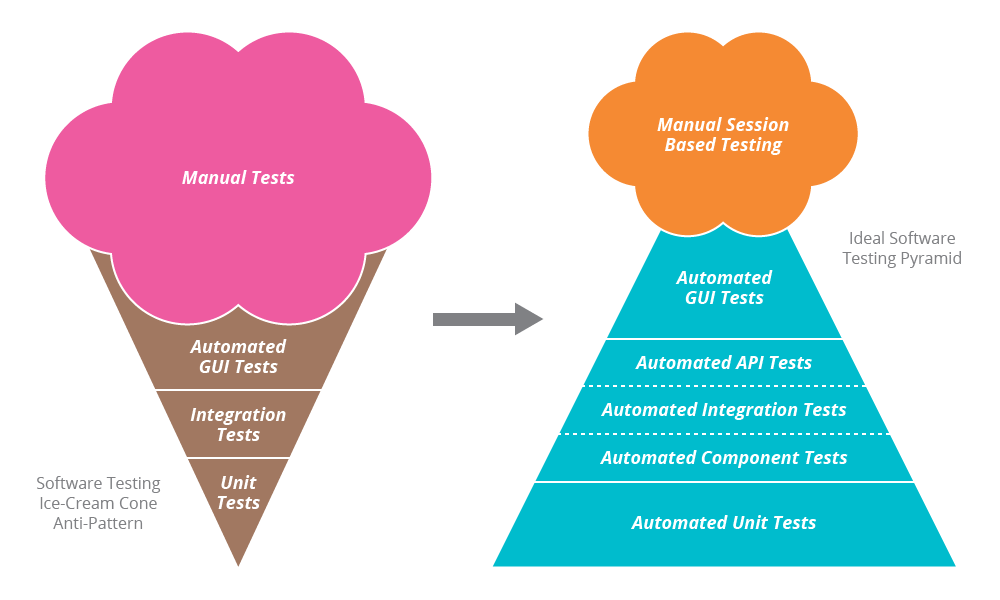

__Broken atomicity__

In [ ]:
def test_add_smth():
    user = create_new_user(email=‘some@ema.il’)
    user.register()
    user.auth()
    smth = user.create_smth()
    smth.add()
    check(user.is_authorized())
    check(smth.is_added())
    check(‘some@ema.il’ == user.email)

__Liar__

In [ ]:
def test_some_feature(self):
    do_smth()
    self.assertTrue(True)

__Giant__

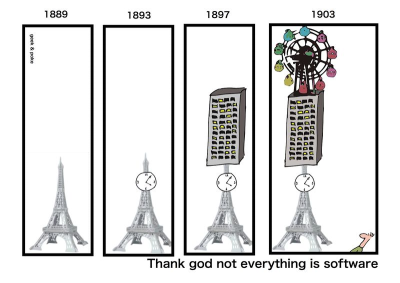

__The Secret Catcher__

In [1]:
def test_smth_one_two_three(self):
    do_smth1()
    do_smth2()
    do_smth3()

__The Inspector__

In [2]:
def test_obj(self):
    # …
    self.assertTrue(42, test_obj._answer)

__The Slowpoke__

In [ ]:
def test_pokemon(self):
    do_smth1()
    time.sleep(N)
    self.assertSmth()

### References

* https://realpython.com/python-testing/
* http://pythontesting.net/strategy/why-most-unit-testing-is-waste/
* https://blog.kentcdodds.com/write-tests-not-too-many-mostly-integration-5e8c7fff591c?gi=822c526c6ab2
* https://books.google.ru/books/about/How_Google_Tests_Software.html?id=vHlTOVTKHeUC&redir_esc=y
* http://chimera.labs.oreilly.com/books/1234000000754
* https://www.amazon.com/Test-Driven-Development-Kent-Beck/dp/0321146530
* https://blogs.msdn.microsoft.com/ericgu/2017/06/22/notdd/
* http://neverworkintheory.org/2016/10/05/test-driven-development.html
* https://www.youtube.com/watch?v=FEs2jgZBaQA

### Summary

* write tests
* not too many
* integration mostly

## Techniques

#### Mocking

When you mock something you’re basically removing all confidence in the integration between what you’re testing and what’s being mocked

In [ ]:
class MockResponse(object):
    def __init__(self, status_code=200, data='OK', headers=None):
        self.status = status_code
        self.data = data
        self.headers = headers

    def read(self):
        return self.data

    def getheader(self, header_name, default):
        return (self.headers or {}).get(header_name, default)

    def getheaders(self):
        return self.headers or {}

    
class MockRBStorageConnection(object):
    def __init__(self, connect_string, timeout):
        self.connect_string = connect_string
        self.timeout = timeout
        self.response = None
        self.content_cache = {}

    def request(self, method, file_path, content=None):
        global _attemps

        if method == 'GET':
            self.response = MockResponse(data=self.content_cache[file_path].read())
            return

        if method == 'HEAD':
            content = self.content_cache[file_path].read()
            self.response = MockResponse(headers=(('content-length', str(len(content))),))
            return

        extention = os.path.splitext(file_path)[1]
        bucket = file_path.split('/')[1]

        if bucket != 'img':
            self.response = MockResponse(status_code=404)
            return

        if 'bad' in file_path:
            self.response = MockResponse(headers={})
            return

        if 'tmp_error' in file_path:
            if not _attemps:
                _attemps += 1
                raise Exception('timeout')

        if 'permanent_error' in file_path:
            raise Exception('timeout')

        _attemps = 0
        file_dir, file_name = get_hash_tuple_from_content(content)

        headers = {'x-filename': '/{bucket}/{file_dir}/{file_name}{extention}'.format(
            file_dir=file_dir, file_name=file_name, extention=extention, bucket=bucket
        )}

        self.content_cache[headers['x-filename']] = content
        self.response = MockResponse(headers=headers)

    def getresponse(self):
        return self.response

    def set_debuglevel(self, level):
        pass

function.py:

In [34]:
def square(value):
    return value ** 2

def cube(value): 
    return value ** 3

def main(value): 
    return square(value) + cube(value)

In [ ]:
try:
    import mock
except ImportError:
    from unittest import mock

import unittest

from function import square, main


class TestNotMockedFunction(unittest.TestCase):

    @mock.patch('__main__.square', return_value=1)
    def test_function(self, mocked_square):
        # because you need to patch in exact place where function that has to be mocked is called
        self.assertEquals(square(5), 1)

    @mock.patch('function.square')
    @mock.patch('function.cube')
    def test_main_function(self, mocked_square, mocked_cube):
        # underling function are mocks so calling main(5) will return mock
        mocked_square.return_value = 1
        mocked_cube.return_value = 0
        self.assertEquals(main(5), 1)
        mocked_square.assert_called_once_with(5)
        mocked_cube.assert_called_once_with(5)


if __name__ == '__main__':
    unittest.main()

In [ ]:
def test_when_request_handled_then_type_info_added(self):
    subtests = [
        ("score", {"Method": "PingAPI"}, {"Method": "PingAPI", 'type': 'score'}),
        ("phone_matching", {"method": "PingAPI"}, {"Method": "PingAPI", 'type': 'phone_matching',
                                                   "method": "PingAPI"})
    ]
    for service, b, expected_b in subtests:
        with mock.patch.multiple(self.request_handler,
                                 ALLOWED_METHODS={service: {"PingAPI": lambda *args: {"Data": 1}}},
                                 s=self.default_settings, sentry_sdk=SENTRY_MOCK):
            self.request_handler.handle_request(request_body=b, context=self.default_ctx)
            self.assertDictEqual(b, expected_b)

#### Monkey patching

In [ ]:
from mock import patch

def freeze_zip(func):
    """
        Использовать как декоратор для тестов, чтобы хэш от zip-архива не менялся со временем
        и не зависел от платформы

    """
    patch1 = patch('zipfile.time.localtime', new=lambda x: (2015, 1, 1, 0, 0, 0))
    patch2 = patch('zipfile.sys.platform', new='linux2')
    return patch1(patch2(func))

In [ ]:
class MonkeypatchPlugin:
    """ setattr-monkeypatching with automatical reversal after test. """
    def pytest_pyfuncarg_monkeypatch(self, pyfuncitem):
        monkeypatch = MonkeyPatch()
        pyfuncitem.addfinalizer(monkeypatch.finalize)
        return monkeypatch
 
notset = object()
 
class MonkeyPatch:
    def __init__(self):
        self._setattr = []
        self._setitem = []
 
    def setattr(self, obj, name, value):
        self._setattr.insert(0, (obj, name, getattr(obj, name, notset)))
        setattr(obj, name, value)
 
    def setitem(self, dictionary, name, value):
        self._setitem.insert(0, (dictionary, name, dictionary.get(name, notset)))
        dictionary[name] = value
 
    def finalize(self):
        for obj, name, value in self._setattr:
            if value is not notset:
                setattr(obj, name, value)
            else:
                delattr(obj, name)
        for dictionary, name, value in self._setitem:
            if value is notset:
                del dictionary[name]
            else:
                dictionary[name] = value
 
 
def test_setattr():
    class A:
        x = 1
    monkeypatch = MonkeyPatch()
    monkeypatch.setattr(A, 'x', 2)
    assert A.x == 2
    monkeypatch.setattr(A, 'x', 3)
    assert A.x == 3
    monkeypatch.finalize()
    assert A.x == 1
 
    monkeypatch.setattr(A, 'y', 3)
    assert A.y == 3
    monkeypatch.finalize()
    assert not hasattr(A, 'y')
 
 
def test_setitem():
    d = {'x': 1}
    monkeypatch = MonkeyPatch()
    monkeypatch.setitem(d, 'x', 2)
    monkeypatch.setitem(d, 'y', 1700)
    assert d['x'] == 2
    assert d['y'] == 1700
    monkeypatch.setitem(d, 'x', 3)
    assert d['x'] == 3
    monkeypatch.finalize()
    assert d['x'] == 1
    assert 'y' not in d

#### Fixtures

In [ ]:
def setUpModule():
    os.environ["MATCHING_CONFIG"] = MATCHING_CONFIG
    os.environ["CONFIG"] = CONFIG
    os.environ["TESTING"] = "True"
    os.environ["WITHOUT_DB"] = "True"
    os.environ["WITHOUT_MATCHING"] = "True"
    open(PHONE_MATCHING_CONFIG, "w")
    open(LOGFILE, "w")
    with open(SCORE_CONFIG, "w") as fp:
        fp.write("LOGFILE='%(log)s'\n" % {"log": LOGFILE})
    SENTRY_MOCK.capture_exception = raise_sentry_captured_exception


def tearDownModule():
    os.remove(MATCHING_CONFIG)
    os.remove(CONFIG)


class WSGIAppTestCase(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        import wsgi_api
        cls.wsgi_api = wsgi_api

    def setUp(self):
        self.default_ctx = {"location": "score", "request_from": "127.0.0.1", "request_id": "1"}

    def test_when_request_body_ok_then_deserialize_success(self):
        d = {"Method": "PingAPI"}
        r, err = self.wsgi_api.deserialize_request_body(json.dumps(d))
        self.assertEqual(err, None)
        self.assertEqual(r, d)

In [36]:
import pytest

def setup_module(module):
    print ("module setup")

def teardown_module(module):
    print ("module teardown")

def setup_function(function):
    print ("function setup")

def teardown_function(function):
    print ("function teardown")

def test_numbers_3_4():
    print "test 3*4"
    assert 3*4 == 12 

def test_strings_a_3():
    print "test a*3"
    assert 'a'*3 == 'aaa' 


class TestUM:
    def setup_class(cls):
        print ("class setup")
 
    def teardown_class(cls):
        print ("class teardown")
 
    def setup_method(self, method):
        print ("method setup")
 
    def teardown_method(self, method):
        print ("method teardown")
 
    def test_numbers_5_6(self):
        print "test 5*6"
        assert 5*6 == 30 
 
    def test_strings_b_2(self):
        print "test b*2"
        assert 'b'*2 == 'bb'

### References

* https://medium.com/written-in-code/testing-anti-patterns-b5ffc1612b8b
* https://semaphoreci.com/community/tutorials/mocks-and-monkeypatching-in-python
* https://holgerkrekel.net/2009/03/03/monkeypatching-in-unit-tests-done-right/
* https://habrahabr.ru/post/269759/

### Summary

* mock is a simplification, don't rely on them heavily
* classic fixtures are (more or less) anti-pattern, beacause of visibility and atomicity issues
* monkey patch only if there no other way

## Automatization

#### Continuous Integration

Continuous Integration is a software development practice where members of a team integrate their work frequently, usually each person integrates at least daily - leading to multiple integrations per day. Each integration is verified by an automated build (including test) to detect integration errors as quickly as possible. Many teams find that this approach leads to significantly reduced integration problems and allows a team to develop cohesive software more rapidly.

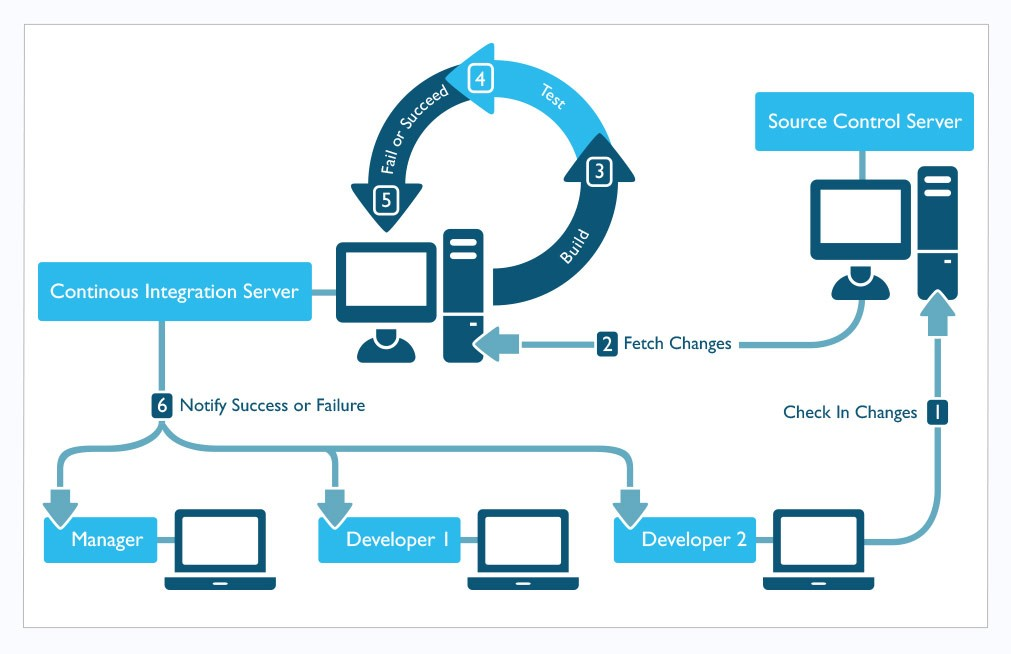

In [ ]:
- job:
    name: ui
    scm:
        - git-ui
    auth-token: SeN6UttXbQxLym3Y

    wrappers:
      - timestamps

    triggers:
        - pollscm: 
            cron: "* * * * *"

    publishers:
        - junit:
            results: reports/*.xml
        - archive:
            artifacts: 'deploy.xml,rpm/*/*/*.rpm'
            allow-empty: 'true'
        - xml-summary:
            files: 'deploy.xml'
        - mail-custom-on-fail:
            recipients: 'me@.mail.ru'

    builders:
        - shell: rm -rf reports/*.xml
        - deploy_ui:
        - shell: docker pull docker.registry.mail.ru/ui
        - shell: ./src/ui/ci/jenkins.sh

In [ ]:
#!/bin/sh

cd `dirname $0`
cd ../rbui/
DJANGO_ENV=TEST python manage.py test

#### Continuous Delivery

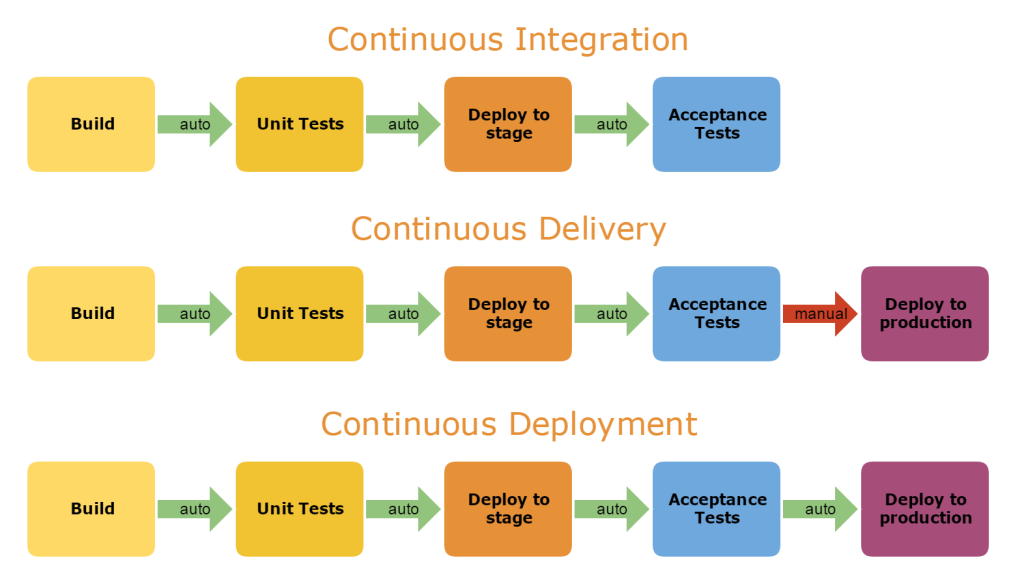

Continuous delivery is an extension of continuous integration. It focuses on automating the software delivery process so that teams can easily and confidently deploy their code to production at any time. Continuous delivery leans heavily on deployment pipelines to automate the testing and deployment processes. A deployment pipeline is an automated system that runs increasingly rigorous test suites against a build as a series of sequential stages. This picks up where continuous integration leaves off, so a reliable continuous integration setup is a prerequisite to implementing continuous delivery.



#### Continuous Deployment

Continuous deployment is an extension of continuous delivery that automatically deploys each build that passes the full test cycle. Instead of waiting for a human gatekeeper to decide what and when to deploy to production, a continuous deployment system deploys everything that has successfully traversed the deployment pipeline. Keep in mind that while new code is automatically deployed, techniques exist to activate new features at a later time or for a subset of users. Deploying automatically pushes features and fixes to customers quickly, encourages smaller changes with limited scope, and helps avoid confusion over what is currently deployed to production.

### References

* https://www.digitalocean.com/community/tutorials/an-introduction-to-continuous-integration-delivery-and-deployment
* https://martinfowler.com/articles/continuousIntegration.html

### Summary

* CI/CD techniques could help scale development process but requries alot of preparation beforehand

## Best practices

#### Feature flags

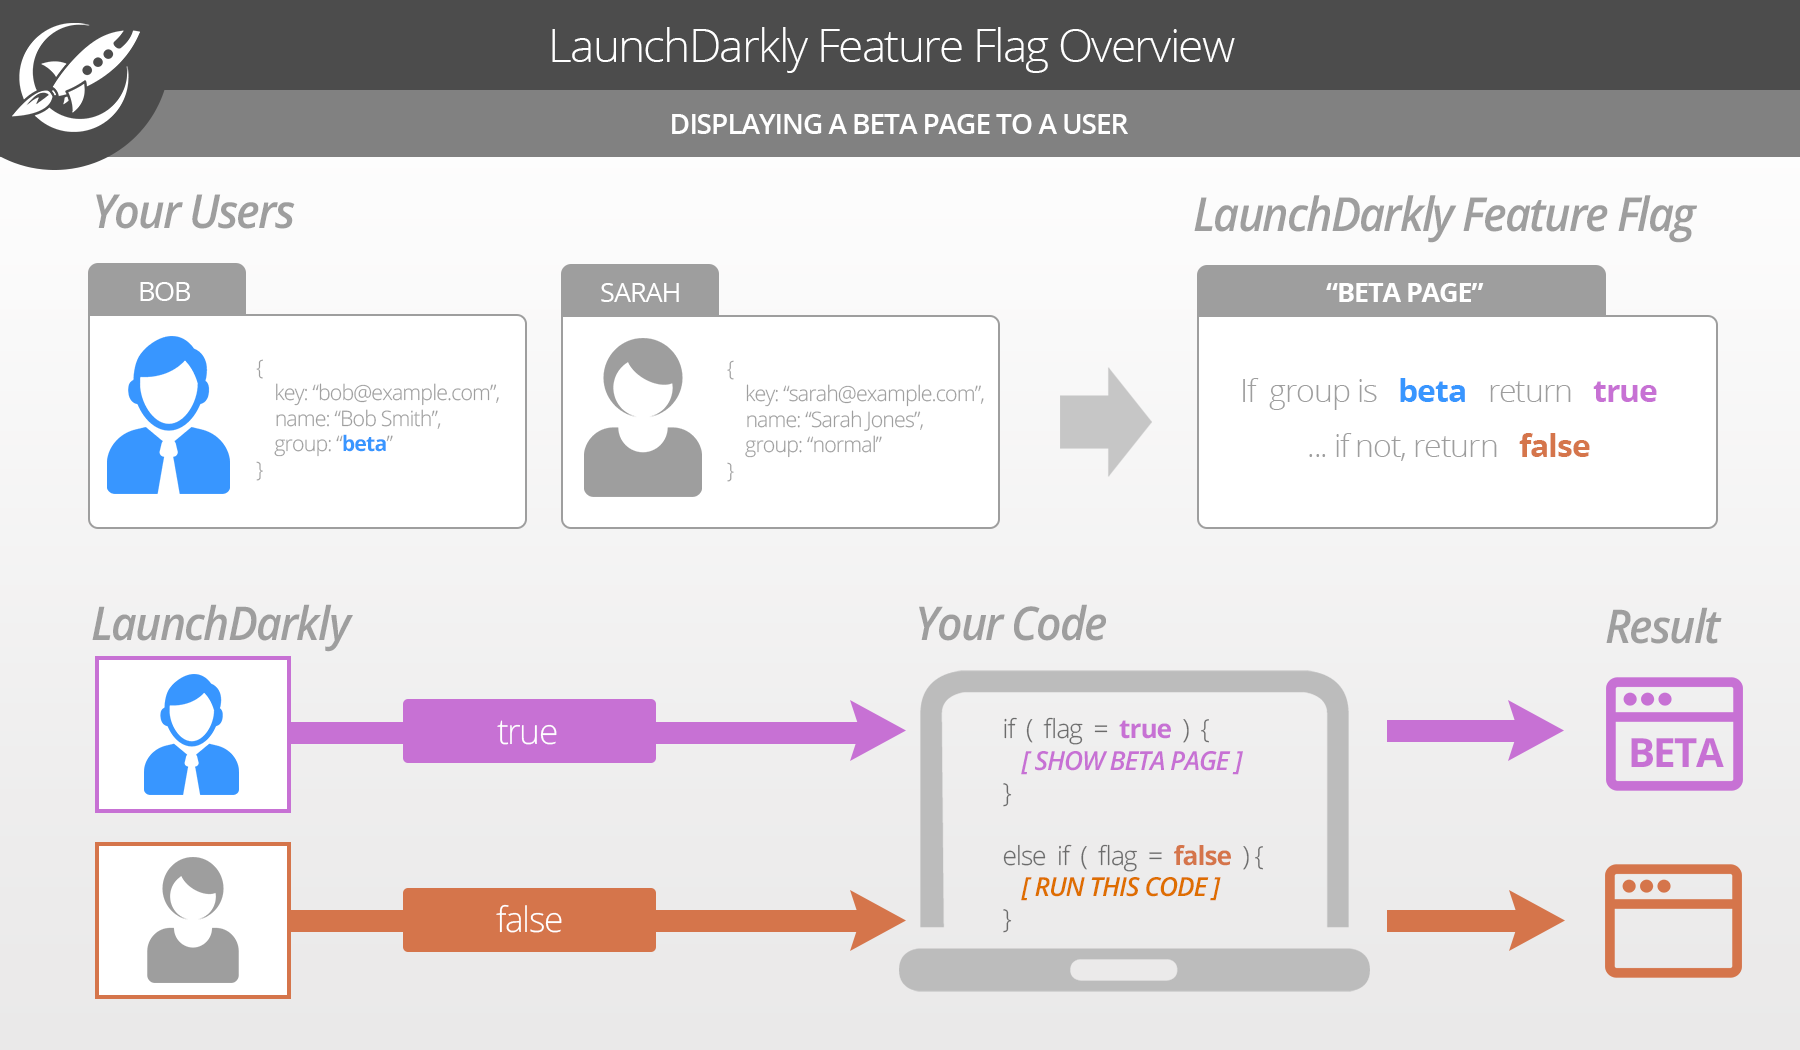

#### Canary deployment

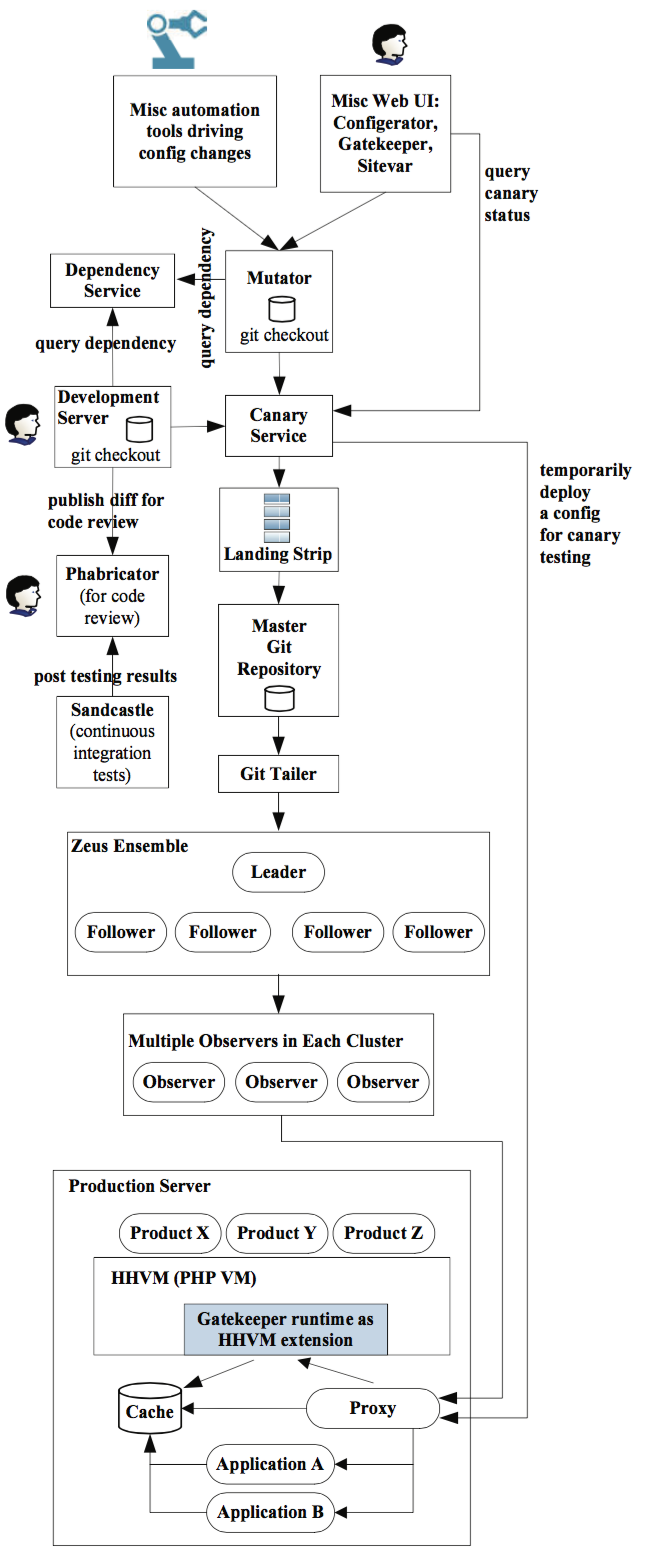

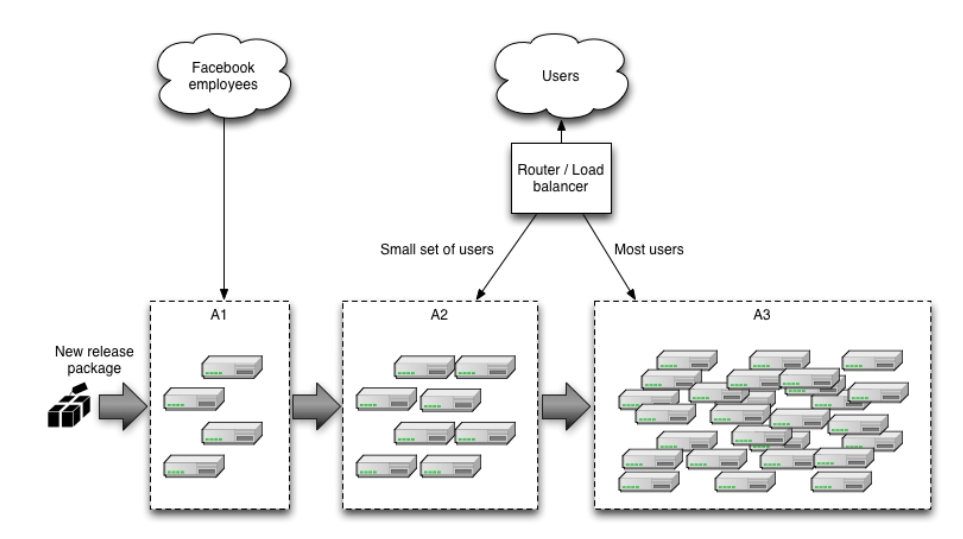

#### Staged rollouts

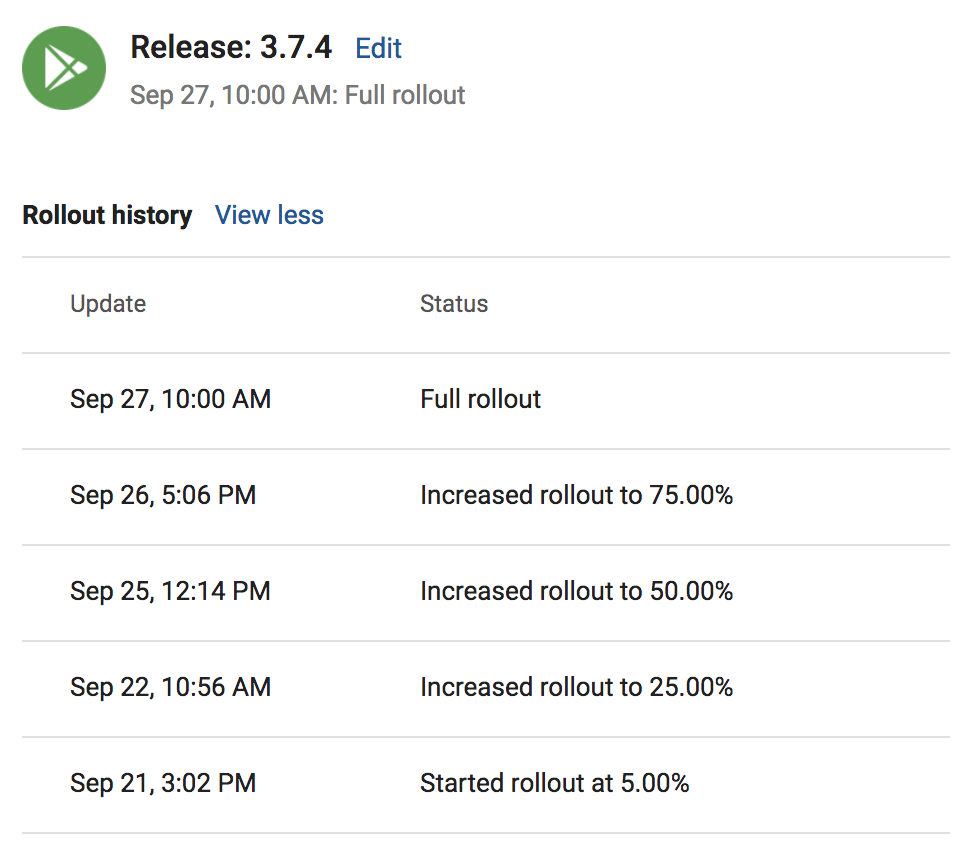

### References

* https://habrahabr.ru/post/168031/
* http://muratbuffalo.blogspot.ru/2016/02/holistic-configuration-management-at.html
* https://ieondemand.com/presentations/cloud-native-hadoop-at-netflix
* https://martinfowler.com/bliki/CanaryRelease.html